[codebasics](https://www.youtube.com/watch?v=zM4VZR0px8E&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=9&t=192s)

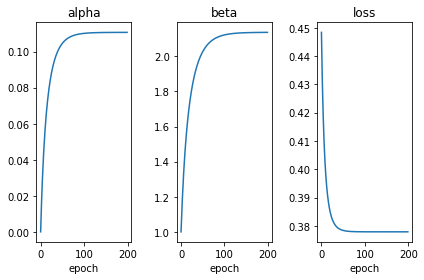

In [1]:
%matplotlib inline
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(0)
tf.set_random_seed(0)

lr = 5e-3
epoch = int(2e4)

df = pd.read_csv("insurance_data.csv")

if 0:
    # wrong
    df = (df-df.mean()) / df.std() 
    x_data = df[['age']].values.astype(np.float32).reshape((-1,1)) 
    y_data = df['bought_insurance'].values.astype(np.float32).reshape((-1,1)) 
elif 0:
    # ok
    x_data = df[['age']].values.astype(np.float32).reshape((-1,1)) 
    y_data = df['bought_insurance'].values.astype(np.float32).reshape((-1,1)) 
elif 1:
    # great
    dg = df[['age']]
    dg = (dg-dg.mean()) / dg.std() 
    x_data = dg.values.astype(np.float32).reshape((-1,1)) 
    y_data = df['bought_insurance'].values.astype(np.float32).reshape((-1,1)) 

x = tf.placeholder(tf.float32, shape=(None,1)) 
y = tf.placeholder(tf.float32, shape=(None,1)) 

if 1:
    alpha = tf.get_variable('alpha', (), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.0))
    beta = tf.get_variable('beta', (1,1), dtype=tf.float32, initializer=tf.keras.initializers.constant(1.0))
elif 0:
    alpha = tf.get_variable('alpha', (), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.5))
    beta = tf.get_variable('beta', (1,1), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.5))
elif 1:
    alpha = tf.get_variable('alpha', (), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.0))
    beta = tf.get_variable('beta', (1,1), dtype=tf.float32, initializer=tf.keras.initializers.RandomUniform())
elif 1:
    alpha = tf.get_variable('alpha', (), dtype=tf.float32, initializer=tf.keras.initializers.constant(0.0))
    beta = tf.get_variable('beta', (1,1), dtype=tf.float32, initializer=tf.keras.initializers.RandomNormal())

logits = alpha + x @ beta
entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y)
loss = tf.reduce_mean(entropy)
train = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

with tf.Session() as sess:
    
    tf.global_variables_initializer().run()
    
    alpha_trace = []
    beta_trace = []
    loss_trace = []
    
    feed_dict = {x:x_data, y:y_data}
    for i in range(epoch):
        if i == 0:
            alpha_run, beta_run, loss_run = sess.run([alpha, beta, loss], feed_dict=feed_dict)
            alpha_trace.append(alpha_run)
            beta_trace.append(beta_run[0,0])
            loss_trace.append(loss_run) 
        elif i % 100 == 0:
            alpha_run, beta_run, loss_run, _ = sess.run([alpha, beta, loss, train], feed_dict=feed_dict)
            alpha_trace.append(alpha_run)
            beta_trace.append(beta_run[0,0])
            loss_trace.append(loss_run) 
        else:
            sess.run(train, feed_dict=feed_dict)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(alpha_trace)
ax1.set_xlabel('epoch')
ax1.set_title('alpha')
ax2.plot(beta_trace)
ax2.set_xlabel('epoch')
ax2.set_title('beta')
ax3.plot(loss_trace)
ax3.set_xlabel('epoch')
ax3.set_title('loss')
plt.tight_layout()
plt.show()